# What we want to do ?

When we want to plot mesh it cost a lot to code.

In [1]:
%matplotlib inline
import meshio
import matplotlib
import getfem as gf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = gf.Mesh("cartesian", np.arange(2), np.arange(2))

In [3]:
m.export_to_vtk("m.vtk", "ascii")

In [4]:
!cat m.vtk

# vtk DataFile Version 2.0
Exported by getfem++
ASCII
DATASET UNSTRUCTURED_GRID
POINTS 4 float
 0 0 0
 1 0 0
 0 1 0
 1 1 0

CELLS 1 5
 4 0 1 3 2

CELL_TYPES 1
 9


In [5]:
mesh = meshio.read("m.vtk")

In [6]:
points = mesh.points
cells = mesh.cells

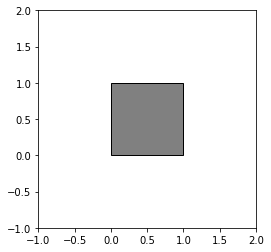

In [7]:
figure = plt.figure()
axe = figure.add_subplot(111)
for cell in cells:
    index = cell.data[0]
    polygon = plt.Polygon(
        (
            (points[index[0], 0], points[index[0], 1]),
            (points[index[1], 0], points[index[1], 1]),
            (points[index[2], 0], points[index[2], 1]),
            (points[index[3], 0], points[index[3], 1]),
        ),
        edgecolor="black",
        facecolor="gray",
    )
axe.add_patch(polygon)
axe.set_aspect("equal")
plt.xlim(-1.0, 2.0)
plt.ylim(-1.0, 2.0)
plt.show()

In [8]:
axe?

Type:            AxesSubplot
String form:     AxesSubplot(0.260833,0.125;0.503333x0.755)
File:            /usr/local/lib/python3.8/dist-packages/matplotlib/axes/_subplots.py
Docstring:       <no docstring>
Class docstring:
Base class for subplots, which are :class:`Axes` instances with
additional methods to facilitate generating and manipulating a set
of :class:`Axes` within a figure.
Init docstring: 
Parameters
----------
fig : `matplotlib.figure.Figure`

*args : tuple (*nrows*, *ncols*, *index*) or int
    The array of subplots in the figure has dimensions ``(nrows,
    ncols)``, and *index* is the index of the subplot being created.
    *index* starts at 1 in the upper left corner and increases to the
    right.

    If *nrows*, *ncols*, and *index* are all single digit numbers, then
    *args* can be passed as a single 3-digit number (e.g. 234 for
    (2, 3, 4)).

**kwargs
    Keyword arguments are passed to the Axes (sub)class constructor.


# What we can do in meshioplt

We can read mesh file and write to AxesSubplot. We can use AxesSubplot as matplotlib's AxesSubplot

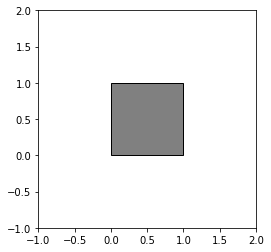

In [9]:
from meshioplt import mesh_patches

figure = plt.figure()
axe = figure.add_subplot(111)
patches = mesh_patches("m.vtk")
for patch in patches:
    axe.add_patch(patch)
axe.set_aspect("equal")
plt.xlim(-1.0, 2.0)
plt.ylim(-1.0, 2.0)
plt.show()